<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Classifiers---Part-Two" data-toc-modified-id="Image-Classifiers---Part-Two-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Classifiers - Part Two</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li><li><span><a href="#Notes-on-the-How-this-Write-up-Evolved" data-toc-modified-id="Notes-on-the-How-this-Write-up-Evolved-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notes on the How this Write-up Evolved</a></span></li><li><span><a href="#Model-Code-Development" data-toc-modified-id="Model-Code-Development-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Code Development</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-data-sets" data-toc-modified-id="Import-libraries-and-data-sets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Import libraries and data sets</a></span></li><li><span><a href="#Write-utility-functions" data-toc-modified-id="Write-utility-functions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Write utility functions</a></span></li><li><span><a href="#Write-the-shallow-neural-network-model-code" data-toc-modified-id="Write-the-shallow-neural-network-model-code-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Write the shallow neural network model code</a></span></li></ul></li><li><span><a href="#Model-Training-with-Variable-Hyperparameters" data-toc-modified-id="Model-Training-with-Variable-Hyperparameters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Training with Variable Hyperparameters</a></span><ul class="toc-item"><li><span><a href="#Smaller-learning-rate-training" data-toc-modified-id="Smaller-learning-rate-training-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Smaller learning rate training</a></span></li><li><span><a href="#Smaller-learning-rate;-more-iterations" data-toc-modified-id="Smaller-learning-rate;-more-iterations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Smaller learning rate; more iterations</a></span></li><li><span><a href="#Larger-learning-rate-training" data-toc-modified-id="Larger-learning-rate-training-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Larger learning rate training</a></span></li><li><span><a href="#Larger-learning-rate;-more-iterations" data-toc-modified-id="Larger-learning-rate;-more-iterations-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Larger learning rate; more iterations</a></span></li></ul></li><li><span><a href="#Verify-Top-Model" data-toc-modified-id="Verify-Top-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Verify Top Model</a></span><ul class="toc-item"><li><span><a href="#Execute-model-with-optimal-hyperparameters" data-toc-modified-id="Execute-model-with-optimal-hyperparameters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Execute model with optimal hyperparameters</a></span></li><li><span><a href="#Generate-F-Score" data-toc-modified-id="Generate-F-Score-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Generate F-Score</a></span></li></ul></li><li><span><a href="#Models-Summary" data-toc-modified-id="Models-Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Models Summary</a></span></li></ul></div>

<h1 style="text-align: center;">Image Classifiers - Part Two</h1>

## Introduction

<img style="float: left; margin-right: 15px;" src="images/catMonocle.jpg" />

The overall goal of this series of write-ups is to explore a number of models performing binary classification on a given set of images.  This is the second write-up in the series where we advance from utilizing a `logistic regression model with gradient descent` to a `shallow neural network`.  Our hope is that for each of the write-ups we'll advance to utilizing a more sophisticated model and achieve better and better classification results.

The specific goal of the model created in this write-up will be to perform binary classification on a set of images utilizing a shallow neural network, predict (hopefully correctly!) if a given image is a cat or not (hence the binary nature of the model), and if possible to perform the classification task better than the previously developed model.  

Comparisons between the models will be achieved through accuracy ratings on the test set, as well as the model's F-Score.

For reference here are links to the previous entries in this series:
* [The logistics of acquiring and developing an image dataset](https://github.com/nrasch/Portfolio/tree/master/Machine-Learning/Python/02-ComputerVision-Dataset-Creation)
* [Binary image classification utilizing logistic regression with gradient descent](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/03-ComputerVision-Classification/Classification-01.ipynb)

So, let's get started!

# Notes on the How this Write-up Evolved

When I first started this write-up I was mostly focused on the mechanics of building the model.  I spend about an hour writing the code, and then blithely fed in my data set.  My first model's output looked something like this:

Well that didn't look so good....  The accuracy was poor and the cost function didn't monotonically decrease!  Hrmm, well I would just make a few adjustments to the learning rate and number of iterations and then wrap up with some great results, right?  Hah!  I tweaked, tweaked, and then tweaked some more, and my models still fell short or barely exceeded what the previous logistic regression model was able to perform.

__And so, at that time, the real focus of this write-up become apparent:  The mechanics of building the model were easy, it was the *TUNING* of the model that was going to require the real effort.__

And so that realization was what fueled most of the work done during this write-up.  I needed a way to quickly generate and adjust a number of hyperparameters that I didn't have to worry about in the logistic regression model, record the results, and then compare the outputs to select the best model and its optimized parameters.

This in turn required I modify my model's code, write a better model execution utility, deal with how to display the outputs of multiple models, manage the display of many cost graphs, and so on and so forth.  So below are the fruits of those efforts, and for this model at least I think they did a pretty good job.  As we delve into additional models and optimizations I have no doubts we'll continue to evolve our utility set.

# Model Code Development

## Import libraries and data sets

In [6]:
%matplotlib inline

# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [9]:
from os import path
from utils import *
import pandas as pd
from IPython.display import display, HTML
import numpy as np
from matplotlib import pyplot as plt
import inspect
import time
import copy

import random 
random.seed(10)
np.random.seed(10)

*** KEYS
HDF5 container keys: ['testData', 'testLabels', 'trainData', 'trainLabels']

*** LABELS
Total number of training labels: 800
Number of cat labels: 396
Number of object labels: 404
First 10 training labels: [0 0 1 1 1 1 1 1 0]


Total number of testing labels: 200
Number of cat labels: 104
Number of object labels: 96
First 10 testing labels: [1 1 0 0 1 1 0 0 0]


*** IMAGE DATA
Image data shape in archive: (800, 64, 64, 3)


First HDF5 container dataSet item shape: (64, 64, 3)
Image data shape after flattening: (192, 64)
First 10 dataSet item matrix values: []


Recreating and showing first 20 images from flattened matrix values:



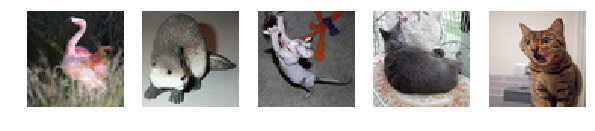

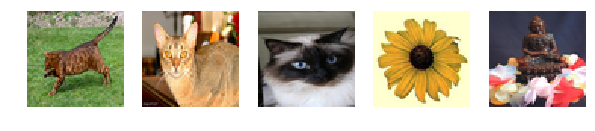

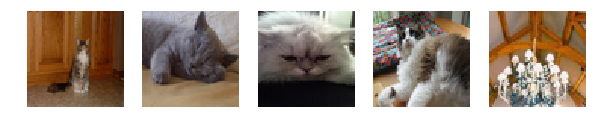

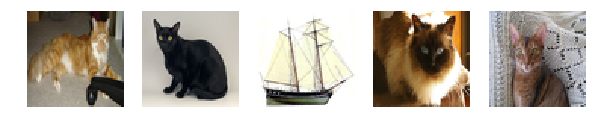

In [10]:
# Examine the data used for training the model
imageData = path.join("datasets", "imageData500_64pixels.hdf5")
validateArchive(imageData)

In [11]:
# Load, shape, and normalize the data used for training the model
with h5py.File(imageData, "r") as archive:   
    trainingData = np.squeeze(archive["trainData"][:])
    testData = np.squeeze(archive["testData"][:])
    trainingLabels = np.array(archive["trainLabels"][:])
    testLabels = np.array(archive["testLabels"][:])
    archive.close()

print("Archive trainingData.shape:    ", trainingData.shape)
print("Archive trainingLabels.shape:  ", trainingLabels.shape)
print("Archive testData.shape:        ", testData.shape)
print("Archive testLabels.shape:      ", testLabels.shape)
print("\n")

# Reshape the training and test data and label matrices
trainingData = trainingData.reshape(trainingData.shape[0], -1).T
testData = testData.reshape(testData.shape[0], -1).T

print ("Flattened, normalized trainingData shape:  " + str(trainingData.shape))
print ("Flattened, normalized testData shape:      " + str(testData.shape))

# Normalization
trainingData = trainingData/255.
testData = testData/255.

Archive trainingData.shape:     (800, 64, 64, 3)
Archive trainingLabels.shape:   (1, 800)
Archive testData.shape:         (200, 64, 64, 3)
Archive testLabels.shape:       (1, 200)


Flattened, normalized trainingData shape:  (12288, 800)
Flattened, normalized testData shape:      (12288, 200)


## Write utility functions

In [28]:
# Great reference:  https://www.python-course.eu/matplotlib_multiple_figures.php

# Write a function to show multiple graphs in the same figure
def printCostGraphs(costs, keys, cols, fsize = (15,6)):
    # Figure out how many rows and columns we need
    counter = 0
    rows = np.ceil(len(costs) / cols)
    fig = plt.figure(figsize = fsize)
    
    # Add each of the cost graphs to the figure
    for key in keys:
        c = np.squeeze(costs[key])
        sub = fig.add_subplot(rows, cols, counter + 1)
        sub.set_title('Epoch ' + str(key))
        sub.plot(c)
        counter = counter + 1
    
    # Draw the figure on the page
    plt.plot()
    plt.tight_layout()
    plt.show()

In [29]:
# Randomize values for hyperparameters based on a given key:value dictionary
class HPicker:
    
    def pick(self, ranges):
        hParams = {}
        
        # For each parameter key:val
        for key, value in ranges.items():
            if isinstance(value, list):
                start, stop, step = value
                vals = []

                # Create a range of possible values
                while (start < stop):
                    start = round(start + step, len(str(step)))
                    vals.append(start)

                # Pick one of the possible values randomly    
                hParams[key] = random.choice(vals)
            else:
                hParams[key] = value
            
        return hParams     

In [7]:
# Create instances of each of the activations we might utilize in the model

class AbstractActivation(object):
    def activate(self, z):
        raise NotImplementedError("Requires implementation by inheriting class.")
        
class Sigmoid(AbstractActivation):
    def activate(z):
        return 1 / (1 + np.exp(-(z)))
        
class Relu(AbstractActivation):
    def activate(z):
        return  z * (z > 0)

In [12]:
# Create a pandas dataframe with labeled columns to record model training results
def getResultsDF(hRanges):
    columns = list(hRanges.keys())
    df = pd.DataFrame(columns = columns)
    
    return(df)

In [13]:
# Do all the heavy lifting required when running N number of models with various hyperparameter configurations
def runModels(hRanges, epochs, silent = False):
    
    # Var inits
    picker = HPicker()
    resultsDF = getResultsDF(hRanges)
    costs = {}
    params = {}
    epoch = 0
    
    print("\n*** Starting model training")
    
    while (epoch < epochs):
        
        # Get the random hyperparam values
        hparams = picker.pick(hRanges)
        hparams["Epoch"] = epoch

        # Print a summary of the model about to be trained and its params to the user
        if silent is not True:
            print("Training epoch", epoch, "with params:  LR", hparams["Learning_Rate"], 
                  ", iterations", hparams["Iterations"], ", HL units", hparams["HL_Units"], 
                  ", lambda", hparams["Lambda"], ", and init. multi.", hparams["Weight_Multi"])

        # Train the model its given hyperparams and record the results
        params[epoch], costs[epoch],  hparams["Descending_Graph"] = model(
            trainingData, trainingLabels, hparams["HL_Units"], hparams["Iterations"], 
            hparams["Learning_Rate"], hparams["Lambda"], hparams["Weight_Multi"], False)
        
        # Make predictions based on the model
        trainingPreds = predict(trainingData, params[epoch], trainingLabels)
        testPreds = predict(testData, params[epoch], testLabels)

        # Record prediction results
        hparams["Train_Acc"] = trainingPreds["accuracy"]
        hparams["Test_Acc"] = testPreds["accuracy"]
        hparams["Final_Cost"] = costs[epoch][-1]

        # Add model results to the pandas dataframe
        resultsDF.loc[epoch] = list(hparams.values())
        epoch = epoch + 1
        
    print("*** Done!\n")
    
    # Sort the dataframe so it's easier to find the results we are interested in
    resultsDF = resultsDF.sort_values(by = ['Descending_Graph', 'Test_Acc'], ascending = False)
  
    return resultsDF, params, costs

## Write the shallow neural network model code

In [10]:
# Define the dimensions of the model
defineDimensions(data, labels, layerSize):
    nnDims = {}
    
    nnDims["numberInputs"] = data.shape[0]
    nnDims["hiddenLayerSize"] = layerSize
    nnDims["numberOutputs"] = labels.shape[0]
    
    return nnDims;

In [2]:
#  Initialize model params (i.e. W and b)
def initilizeParameters(dimensionDict, multiplier):
  
    np.random.seed(10)  # Yes, this has to be done every time...  :(
    w1 = np.random.randn(dimensionDict["hiddenLayerSize"], dimensionDict["numberInputs"]) * multiplier
    
    np.random.seed(10)  # Yes, this has to be done every time...  :(
    w2 = np.random.randn(dimensionDict["numberOutputs"], dimensionDict["hiddenLayerSize"]) * multiplier
        
    b1 = np.zeros((dimensionDict["hiddenLayerSize"], 1)) 
    b2 = np.zeros((dimensionDict["numberOutputs"], 1))
    
    params = {
        "w1" : w1,
        "w2" : w2,
        "b1" : b1,
        "b2" : b2}
    
    return params
    

In [12]:
# Perform forward propogation
def forwardPropagation(data, params, activation = Sigmoid()):
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    
    z1 = np.dot(w1, data) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = Sigmoid.activate(z2)
    
    # Sanity check the dimensions
    assert(a2.shape == (1, data.shape[1]))
    
    cache = {"z1": z1,
             "a1": a1,
             "z2": z2,
             "a2": a2}
    
    return cache

In [4]:
# Calculate the cost of the model (includes L2 regularization)
def calculateCost(labels, params, cache, lamb):
    # Define vars to make reading and writing the formulas easier below...
    m = labels.shape[1]
    a2 = cache["a2"]
    w1 = params["w1"]
    w2 = params["w2"]
         
    # Perform cost and regularization calculations
    crossEntropyCost = (-1/m) * np.sum( labels*np.log(a2) + (1-labels)*np.log(1-a2) )
    l2RegularizationCost = (1/m) * (lamb/2) * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
    finalCost = crossEntropyCost + l2RegularizationCost
    
    return finalCost

In [14]:
# Perform backward propogation
def backwardPropagation(data, labels, params, cache, lamb):
    # Define and populate variables
    m = data.shape[1]
    w1 = params["w1"]
    w2 = params["w2"]
    a1 = cache["a1"]
    a2 = cache["a2"]
        
    # Calculate gradients
    dz2 = a2 - labels
    dw2 = (1/m) * np.dot(dz2, a1.T) + (lamb/m) * w2
    db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)
    dz1 = np.dot(w2.T, dz2) * (1 - np.power(a1, 2))
    dw1 = (1/m) * np.dot(dz1, data.T) +  (lamb/m) * w1
    db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)
    
    # Store in the gradients cache
    gradients = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2}
    
    return gradients

In [15]:
# Update the model params based on the results of the backward propogation calculations
def updateParams(params, gradients, learningRate):
    params["w1"] = params["w1"] - learningRate * gradients["dw1"]
    params["b1"] = params["b1"] - learningRate * gradients["db1"]
    params["w2"] = params["w2"] - learningRate * gradients["dw2"]
    params["b2"] = params["b2"] - learningRate * gradients["db2"]
    
    return params

In [15]:
# Define the actual neural network classification model
def model(data, labels, layerSize, numIterations, learningRate, lamb, initializeMultiplier, printCost = False, showGraph = False):
    
    # Init vars
    dims = defineDimensions(data, labels, layerSize)
    params = initilizeParameters(dims, initializeMultiplier)
    costs = []
    descendingGraph = True
    
    # For each training iteration
    for i in range(0, numIterations + 1):
         
        # Forward propagation
        cache = forwardPropagation(data, params)
        
        # Cost function
        cost = calculateCost(labels, params, cache, lamb)
 
        # Backward  propagation
        grads = backwardPropagation(data, labels, params, cache, lamb)
 
        # Gradient descent parameter update
        params = updateParams(params, grads, learningRate)
        
        # Print the cost every N number of iterations
        if printCost and i % 500 == 0:
            print ("Cost after iteration", str(i), "is", str(cost))
        
        # Record the cost every N number of iterations
        if i % 500 == 0:
            if (len(costs) != 0) and (cost > costs[-1]):
                descendingGraph = False
            costs.append(cost)
      
    # Print the model training cost graph
    if showGraph:
        _costs = np.squeeze(costs)
        plt.plot(_costs)
        plt.ylabel('Cost')
        plt.xlabel('Iterations (every 100)')
        plt.title("Learning rate =" + str(learningRate))
        plt.show()

    return params, costs, descendingGraph

In [17]:
# Utilize the model's trained params to make predictions
def predict(data, params, trueLabels):
    # Apply the training weights and the sigmoid activation to the inputs
    cache = forwardPropagation(data, params)
    
    # Classify anything with a probability of greater than 0.5 to a 1 (i.e. cat) classification
    predictions = (cache["a2"] > 0.5)
    accuracy = 100 - np.mean(np.abs(predictions - trueLabels)) * 100
    
    preds = {"predictions" : predictions, "accuracy": accuracy}

    return preds

# Model Training with Variable Hyperparameters

It's finally time to test the model with a number of hyperparameter configurations, and we'll see if we can't find some combination of hyperparameters that optimizes and improves on the classification prediction rate.  

For reference here is what we achieved without model tuning:

`
Train accuracy: 90.625
Test accuracy: 62.0
`

We'll start with 80 models utilizing a smaller learning rate with more and less iterations, and then we'll take a look at another 80 models having a larger learning rate again with more and less iterations.  Hopefully one or more of the 160 total model will have good results, and we can then look at its F-Score for comparison to the logistic regression model we generated in the [last write-up](https://github.com/nrasch/Portfolio/tree/master/Machine-Learning/Python/02-ComputerVision-Dataset-Creation).

For each model the hyperparameters will be generated randomly from a defined range.  This should help us to quickly explore a number of combinations without having to hand-craft each one.

## Smaller learning rate training

In [57]:
h1 = {
    "Epoch": None,
    "HL_Units": [2, 8, 1],
    "HL_Size": 1,
    "Iterations": [750, 2000, 50],
    "Learning_Rate": [0, .01, .001],
    "Lambda": [0, 2, .1],
    "Weight_Multi": [0, 0.001, .0001],
    "Train_Acc": None,
    "Test_Acc": None,
    "Final_Cost": None,
    "Descending_Graph": True
}

r1, p1, c1 = runModels(h1, 40, True)
display(HTML(r1.to_html()))


*** Starting model training
*** Done!



,Epoch,HL_Units,HL_Size,Iterations,Learning_Rate,Lambda,Weight_Multi,Train_Acc,Test_Acc,Final_Cost,Descending_Graph
24,24,8,1,1150,0.009,0.9,0.0009,77.750,69.5,0.567576,True
9,9,5,1,1650,0.006,0.8,0.0006,71.875,68.0,0.510398,True
32,32,4,1,1500,0.007,1.7,0.0008,72.250,68.0,0.531841,True
36,36,8,1,1100,0.010,1.9,0.0008,78.125,68.0,0.595439,True
27,27,6,1,1650,0.010,1.2,0.0009,85.500,67.0,0.515924,True
12,12,4,1,1150,0.007,0.8,0.0001,73.625,66.5,0.608160,True
20,20,6,1,2000,0.006,1.1,0.0007,74.500,66.5,0.488919,True
21,21,4,1,800,0.009,0.2,0.0006,72.875,66.0,0.658947,True
1,1,3,1,1100,0.008,1.6,0.0005,70.000,65.5,0.564497,True
6,6,8,1,1250,0.006,0.5,0.0008,74.500,65.5,0.594659,True


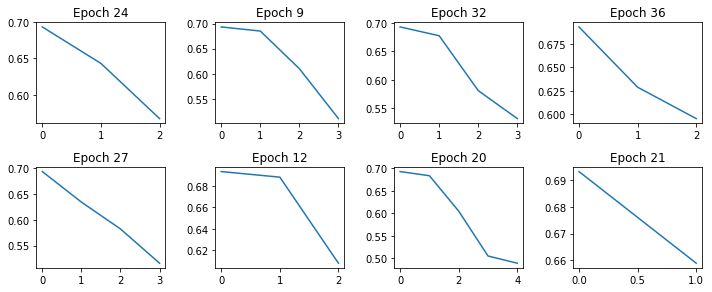

In [58]:
printCostGraphs(c1, list(r1.iloc[0:8, 0]), 4, (10,20))

## Smaller learning rate; more iterations

In [61]:
h3 = {
    "Epoch": None,
    "HL_Units": [2, 8, 1],
    "HL_Size": 1,
    "Iterations": [2000, 10000, 500],
    "Learning_Rate": [0, .01, .001],
    "Lambda": [0, 2, .1],
    "Weight_Multi": [0, 0.001, .0001],
    "Train_Acc": None,
    "Test_Acc": None,
    "Final_Cost": None,
    "Descending_Graph": True
}

r3, p3, c3 = runModels(h3, 40, True)
display(HTML(r3.to_html()))


*** Starting model training
*** Done!



,Epoch,HL_Units,HL_Size,Iterations,Learning_Rate,Lambda,Weight_Multi,Train_Acc,Test_Acc,Final_Cost,Descending_Graph
36,36,7,1,3000,0.007,2.0,0.0002,90.250,70.0,0.349669,True
11,11,4,1,4500,0.005,0.7,0.0004,86.875,66.5,0.314388,True
39,39,8,1,3500,0.002,0.3,0.0006,72.625,66.5,0.564334,True
21,21,6,1,2500,0.003,0.9,0.0002,72.625,66.0,0.572031,True
37,37,8,1,3000,0.003,0.2,0.0001,77.250,66.0,0.521390,True
7,7,7,1,5500,0.005,1.2,0.0002,92.625,64.0,0.237177,True
8,8,4,1,2500,0.002,1.3,0.0001,65.000,64.0,0.664944,True
20,20,4,1,6500,0.005,0.6,0.0002,95.125,64.0,0.189869,True
17,17,7,1,5000,0.001,1.3,0.0010,67.625,63.5,0.626675,True
14,14,3,1,4000,0.001,0.2,0.0003,63.125,63.0,0.677799,True


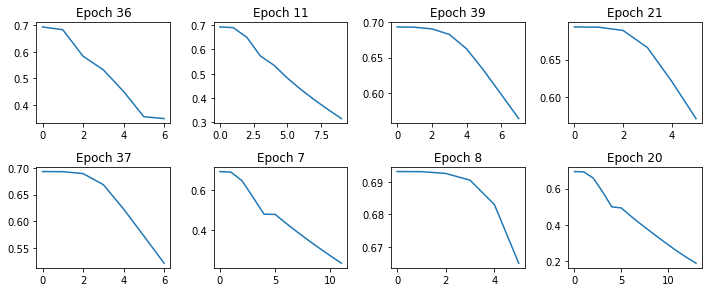

In [62]:
printCostGraphs(c3, list(r3.iloc[0:8, 0]), 4, (10,20))

## Larger learning rate training

In [59]:
h2 = {
    "Epoch": None,
    "HL_Units": [2, 8, 1],
    "HL_Size": 1,
    "Iterations": [750, 2000, 50],
    "Learning_Rate": [0, .1, .01],
    "Lambda": [0, 2, .1],
    "Weight_Multi": [0, 0.001, .0001],
    "Train_Acc": None,
    "Test_Acc": None,
    "Final_Cost": None,
    "Descending_Graph": True
}

r2, p2, c2 = runModels(h2, 40, True)
display(HTML(r2.to_html()))


*** Starting model training
*** Done!



,Epoch,HL_Units,HL_Size,Iterations,Learning_Rate,Lambda,Weight_Multi,Train_Acc,Test_Acc,Final_Cost,Descending_Graph
1,1,6,1,1100,0.06,0.6,0.0002,83.375,73.0,0.350286,True
33,33,7,1,1450,0.06,1.8,0.0007,85.375,72.5,0.412003,True
3,3,8,1,1250,0.08,1.7,0.0007,82.625,71.0,0.478089,True
8,8,5,1,1200,0.06,1.5,0.0007,79.250,70.5,0.392045,True
15,15,7,1,1950,0.05,0.1,0.0010,90.500,70.5,0.311047,True
16,16,5,1,1800,0.06,0.3,0.0007,86.500,70.5,0.433791,True
27,27,5,1,900,0.07,1.5,0.0010,79.375,70.5,0.569526,True
36,36,8,1,1700,0.06,0.6,0.0005,91.000,70.5,0.327656,True
17,17,7,1,1350,0.05,2.0,0.0003,86.375,70.0,0.392760,True
19,19,3,1,1150,0.10,0.3,0.0007,82.000,69.5,0.447228,True


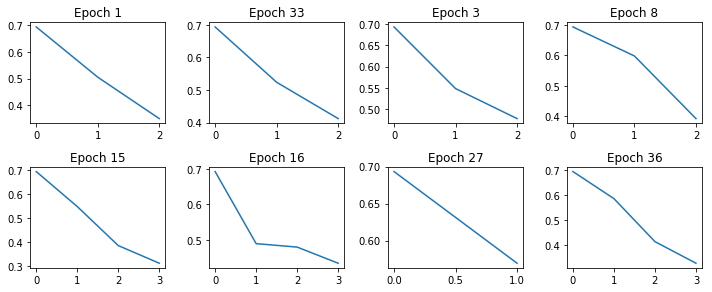

In [60]:
printCostGraphs(c2, list(r2.iloc[0:8, 0]), 4, (10,20))

## Larger learning rate; more iterations

In [63]:
h4 = {
    "Epoch": None,
    "HL_Units": [2, 8, 1],
    "HL_Size": 1,
    "Iterations": [2000, 10000, 500],
    "Learning_Rate": [0, .1, .01],
    "Lambda": [0, 2, .1],
    "Weight_Multi": [0, 0.001, .0001],
    "Train_Acc": None,
    "Test_Acc": None,
    "Final_Cost": None,
    "Descending_Graph": True
}

r4, p4, c4 = runModels(h4, 40, True)
display(HTML(r4.to_html()))


*** Starting model training
*** Done!



,Epoch,HL_Units,HL_Size,Iterations,Learning_Rate,Lambda,Weight_Multi,Train_Acc,Test_Acc,Final_Cost,Descending_Graph
32,32,6,1,3000,0.02,1.6,0.0006,98.250,68.5,0.151224,True
6,6,4,1,2500,0.08,0.6,0.0003,79.500,67.0,0.402815,True
18,18,8,1,4500,0.08,0.6,0.0004,97.750,71.5,0.146351,False
38,38,7,1,3500,0.08,0.2,0.0009,85.750,70.5,0.410727,False
1,1,8,1,8500,0.09,1.8,0.0004,93.625,70.0,0.413673,False
24,24,3,1,5000,0.07,1.0,0.0003,96.875,69.5,0.193465,False
29,29,5,1,3000,0.03,0.8,0.0002,96.000,69.5,0.213647,False
33,33,6,1,9000,0.08,1.2,0.0002,95.250,69.5,0.237999,False
25,25,4,1,2500,0.03,1.5,0.0006,90.000,69.0,0.264472,False
26,26,3,1,6000,0.01,0.1,0.0003,95.875,69.0,0.238603,False


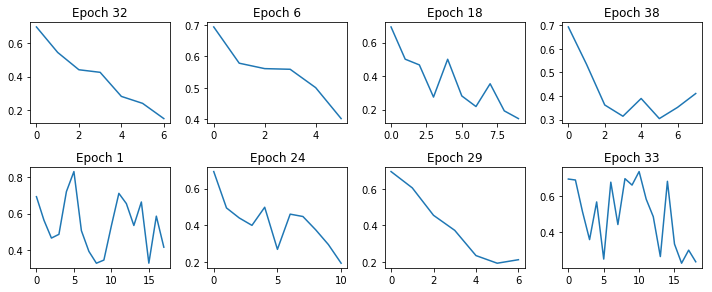

In [64]:
printCostGraphs(c4, list(r4.iloc[0:8, 0]), 4, (10,20))

# Verify Top Model

In [16]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

If we examine the training results for the 160 models we find that the one with the best performance is the Epoch 1 model from the larger learning rate training batch.

It had the following hyperparameters:

|Hyperparameter     |Value   |
|-------------------|--------|
|Hidden Layer Units |6 	     |
|Training Iterations|1100    |
|Learning Rate:     |0.06    |
|L2 Lambda:         |0.6     |
|Weight Multiplier: |0.0002  | 


The test and training accuracy were:

|Dataset|Value  |
|-------|-------|
|Train  |83.4%  |
|Test   |73.0%  | 


Let's train the model again, ensure we can reproduce the cost graph and test set accuracy rate, and then generate the F-Score for comparison.

## Execute model with optimal hyperparameters

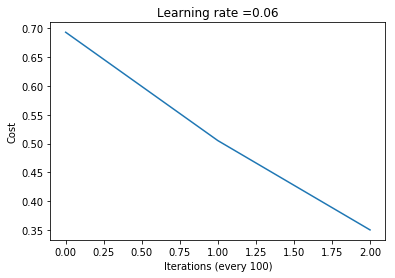


Train accuracy: 83.375
Test accuracy: 73.0


In [21]:
# Epoch 	HL_Units 	HL_Size 	Iterations 	Learning_Rate 	Lambda 	Weight_Multi 	Train_Acc 	 Test_Acc 	Final_Cost 	Descending_Graph
# 1	6	1	1100	0.06	0.6	0.0002	83.375	73.0	0.350286	True

pLarge, cLarge, gLarge = model(trainingData, trainingLabels, 6, 1100, .06, .6, .0002, False, True)

trainingPredsLarge = predict(trainingData, pLarge, trainingLabels)
testPredsLarge = predict(testData, pLarge, testLabels)
print("\nTrain accuracy:", trainingPredsLarge["accuracy"])
print("Test accuracy:", testPredsLarge["accuracy"])

## Generate F-Score

In [22]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(np.squeeze(testLabels), np.squeeze(testPredsLarge["predictions"]))

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-Score: {}'.format(fscore))

Precision: [0.69090909 0.77777778]
Recall: [0.79166667 0.67307692]
F-Score: [0.73786408 0.72164948]


# Models Summary

So far in this series of write-ups we have the following results:

<table>
    <tr>
        <th>Model Type</th>
        <th>Test Set Accuracy</th>
        <th>F-Score</th>
    </tr>
    <tr>
        <td>Linear regression</td>
        <td>65.5%</td>
        <td>[0.64974619 0.66009852]</td>
    </tr>
    <tr>
        <td>Shallow neural network</td>
        <td>73.0%</td>
        <td>[0.73786408 0.72164948]</td>
    </tr>
</table>

<p>As we continue to explore other models and optimization we will hopefully see these metrics continue to improve.</p>
